In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader

from binarypredictor import split_functions
from binarypredictor.dataset import FunctionPairDataset
from binarypredictor.net import DerivativeNet, TangentNet

In [2]:
out_features = 500
in_features = out_features

In [3]:
net_0 = DerivativeNet(train=False, net='FirstDerivativeNet_250_s.pth')
net_1 = DerivativeNet(train=False, net='SecondDerivativeNet_250_s.pth')

In [4]:
fpd = FunctionPairDataset(n_functions=1000, filename="test_.csv", overwrite=False, step=1/in_features)
fpd.create_functions()

In [5]:
x = torch.arange(1e-10, 1., step=fpd.step)

In [14]:
d = fpd[2]
print(d[1])
scale = d[2].unsqueeze(-1)
inp = torch.hstack((d[0][:, 0], d[0][:, 1]))

[{'o': 0, 'T': 2021.3972702069009, 'tm1': 1535.3910315932442, 'tm2': 291.0869538910844, 'tm': 913.2389927421643, 'a': -22778.006956975063, 's1': 1.2537977923922594, 's2': 8.443917957196431}, {'o': 0, 'T': 2021.3972702069009, 'tm1': 1535.3910315932442, 'tm2': 291.0869538910844, 'tm': 913.2389927421643, 'a': 7592.668985658354, 's1': 0, 's2': 0}]


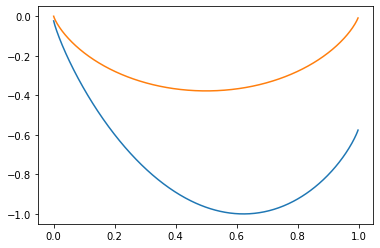

In [15]:
plt.plot(x, d[0][:, 0])
plt.plot(x, d[0][:, 1])
plt.show()

In [8]:
new_idx = torch.arange(1, len(d[0][:, 0]), 2)
inp_ = d[0][new_idx].unsqueeze(0)
splits = split_functions(net_0, net_1, inp_)

([], [])
